In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [17]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800
...,...,...,...,...,...
2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200


In [18]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800


In [19]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,258.859985,254.509995,257.649994,41147100
2026-01-29,255.610001,259.649994,254.410004,258.070007,17297683


# 2. Data Exploration and Visualization

In [20]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800
...,...,...,...,...,...
2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.shape

(2515, 5)

In [23]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [24]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,116.031918,117.184566,114.771385,115.929407,1.001726e+08
std,73.956192,74.666385,73.189355,73.902148,5.604837e+07
min,20.604076,20.907416,20.405654,20.526535,1.729768e+07
25%,41.951384,42.354620,41.690062,41.978387,6.080420e+07
50%,122.305260,123.408228,120.947317,122.148502,8.799110e+07
75%,172.491608,174.612171,171.166136,172.576900,1.223946e+08
max,286.190002,288.619995,283.299988,286.200012,4.584084e+08


In [25]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [26]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800


In [27]:
df.columns = df.columns.get_level_values(0)  
df.columns.name = None

In [28]:
df = df.reset_index()

In [29]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800


In [30]:
df.columns = df.columns.get_level_values(0)
df

,Date,Close,High,Low,Open,Volume
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800
...,...,...,...,...,...,...
2510,2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000
2511,2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200
2512,2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2513,2026-01-28,256.440002,258.859985,254.509995,257.649994,41147100


Text(0, 0.5, 'Close price')

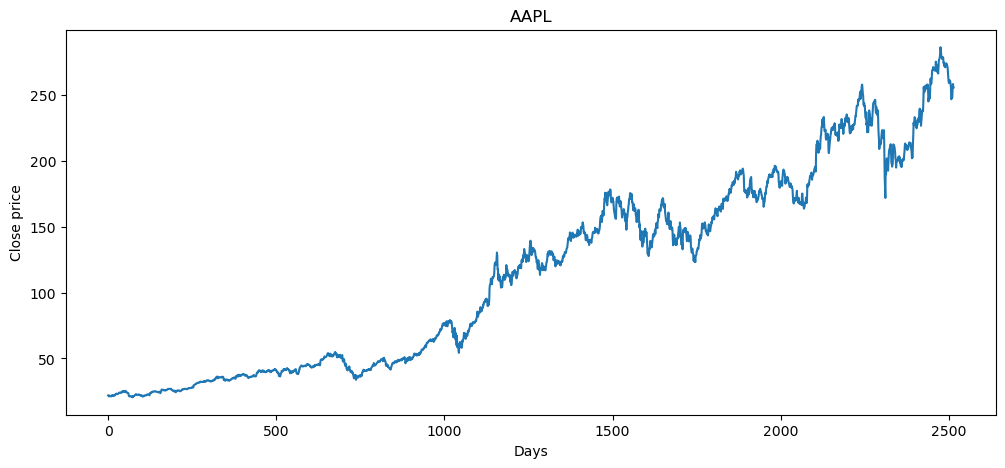

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [32]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [33]:
df1['MA_5'] = df1.rolling(5).mean()

In [34]:
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


# 100 Days Moving Average

In [35]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000,NaN
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000,NaN
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800,NaN
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN


In [36]:
df.head(103)

,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000,NaN
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000,NaN
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800,NaN
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN
...,...,...,...,...,...,...,...
98,2016-06-20,21.689705,22.024972,21.673740,21.894971,137647600,NaN
99,2016-06-21,21.874439,21.974790,21.593909,21.653209,142185600,22.724584
100,2016-06-22,21.792332,22.097948,21.746716,21.951982,116876400,22.723035
101,2016-06-23,21.917772,21.961107,21.723911,21.881282,128960800,22.724793


Text(0, 0.5, 'Close price')

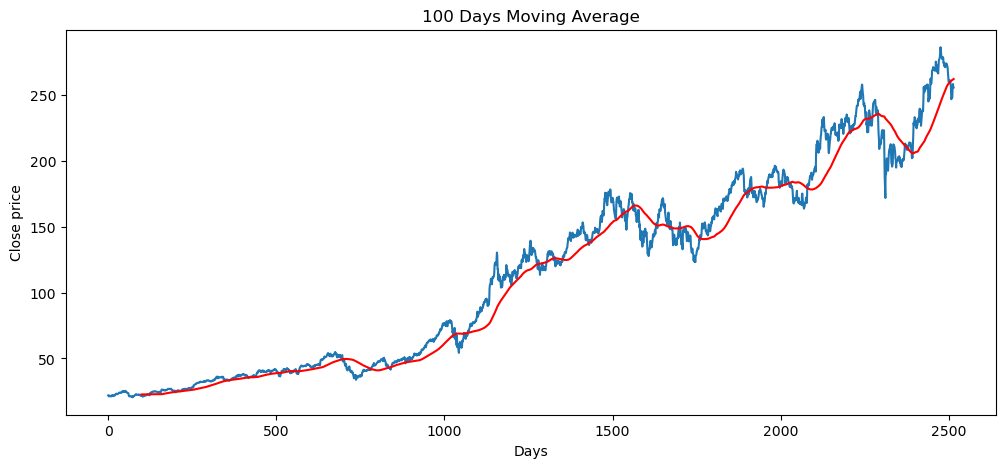

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r');
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')


# 200 Days Moving Average

In [38]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000,NaN,NaN
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000,NaN,NaN
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800,NaN,NaN
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200,NaN,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-09,25.556223,25.657637,24.903951,25.325737,236705600,24.587327,NaN
199,2016-11-10,24.844028,25.604629,24.392277,25.604629,228538000,24.617023,23.670803
200,2016-11-11,24.991535,25.092949,24.558223,24.689600,136575600,24.649015,23.686025
201,2016-11-14,24.364616,24.848635,23.988926,24.825587,204702000,24.673484,23.699139


Text(0, 0.5, 'Close price')

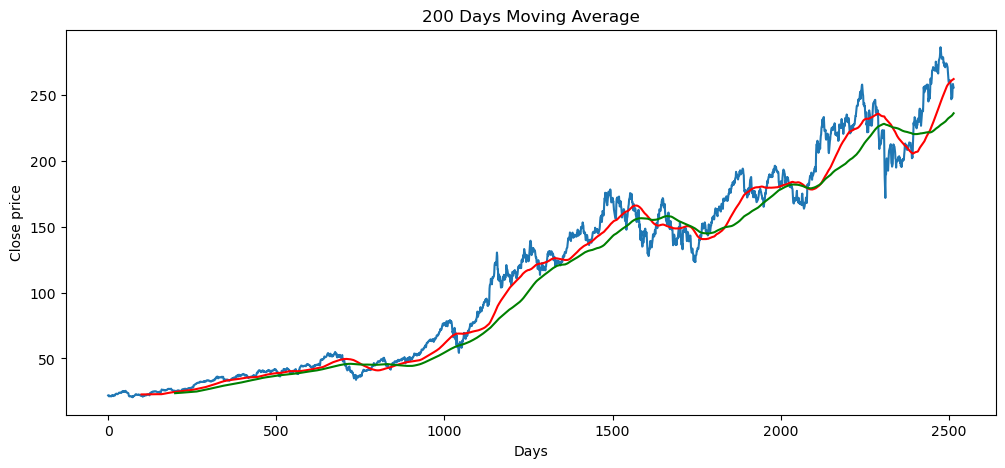

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r');
plt.plot(df['MA_200'],'g');
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')

In [40]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-29,21.947147,21.947147,21.272996,21.372203,257666000,NaN,NaN
1,2016-02-01,21.741966,21.805097,21.509734,21.750985,163774000,NaN,NaN
2,2016-02-02,21.302303,21.654034,21.257209,21.514243,149428800,NaN,NaN
3,2016-02-03,21.723930,21.834410,21.212117,21.419548,183857200,NaN,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000,261.263298,234.734570
2511,2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200,261.522423,235.152458
2512,2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300,261.722733,235.452946
2513,2026-01-28,256.440002,258.859985,254.509995,257.649994,41147100,261.891655,235.786291


### Calculating % changed in each trading session

In [41]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]

,Close,Percentage Changed
0,21.947147,NaN
1,21.741966,-0.009349
2,21.302303,-0.020222
3,21.723930,0.019793
4,21.898487,0.008035
...,...,...
2510,248.039993,-0.001248
2511,255.410004,0.029713
2512,258.269989,0.011198
2513,256.440002,-0.007086


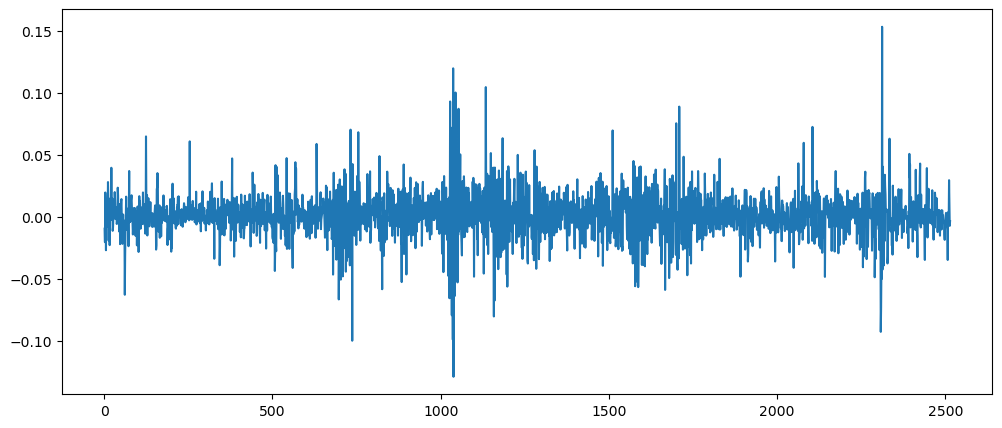

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [43]:
df.shape

(2515, 9)

In [44]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training)
print(data_testing)

           Close
0      21.947147
1      21.741966
2      21.302303
3      21.723930
4      21.898487
...          ...
1755  133.259628
1756  135.820938
1757  139.012833
1758  140.411743
1759  139.751678

[1760 rows x 1 columns]
           Close
1760  141.820480
1761  143.761169
1762  140.874710
1763  142.145569
1764  143.268585
...          ...
2510  248.039993
2511  255.410004
2512  258.269989
2513  256.440002
2514  255.610001

[755 rows x 1 columns]


In [45]:
data_training

,Close
0,21.947147
1,21.741966
2,21.302303
3,21.723930
4,21.898487
...,...
1755,133.259628
1756,135.820938
1757,139.012833
1758,140.411743


In [46]:
data_testing

,Close
1760,141.820480
1761,143.761169
1762,140.874710
1763,142.145569
1764,143.268585
...,...
2510,248.039993
2511,255.410004
2512,258.269989
2513,256.440002


### Scaling down the data between 0 and 1

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [48]:
data_training_array = scaler.fit_transform(data_training) 
data_training_array

array([[0.00851844],
       [0.00721708],
       [0.00442851],
       ...,
       [0.75100898],
       [0.75988158],
       [0.75569511]])

In [49]:
type(data_training_array)

numpy.ndarray

In [50]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [51]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train)    

In [52]:
x_train

array([[[0.00851844],
        [0.00721708],
        [0.00442851],
        ...,
        [0.00721831],
        [0.00688561],
        [0.00805729]],

       [[0.00721708],
        [0.00442851],
        [0.00710269],
        ...,
        [0.00688561],
        [0.00805729],
        [0.00753652]],

       [[0.00442851],
        [0.00710269],
        [0.00820982],
        ...,
        [0.00805729],
        [0.00753652],
        [0.00833213]],

       ...,

       [[0.87599109],
        [0.86058329],
        [0.85004124],
        ...,
        [0.71414429],
        [0.71451921],
        [0.73076435]],

       [[0.86058329],
        [0.85004124],
        [0.85465751],
        ...,
        [0.71451921],
        [0.73076435],
        [0.75100898]],

       [[0.85004124],
        [0.85465751],
        [0.84124586],
        ...,
        [0.73076435],
        [0.75100898],
        [0.75988158]]])

In [53]:
x_train.ndim

3

In [54]:
y_train.ndim

1

In [55]:
x_train.shape

(1660, 100, 1)

In [56]:
y_train.shape

(1660,)

## 6. Model Building

In [57]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [58]:
# Ml Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [59]:
model = Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.0110
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 6.9901e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 6.6735e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 6.5642e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 6.2750e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 7.3006e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 6.1769e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 6.0879e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 5.4226e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.2840e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.7548e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.6113e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.3292e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.3671e-04
Epoch 15/50
52/52 

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [62]:
#Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [63]:
data_training.tail(100)

,Close
1660,155.354706
1661,153.240143
1662,151.981262
1663,153.387680
1664,151.912430
...,...
1755,133.259628
1756,135.820938
1757,139.012833
1758,140.411743


In [64]:
data_testing

,Close
1760,141.820480
1761,143.761169
1762,140.874710
1763,142.145569
1764,143.268585
...,...
2510,248.039993
2511,255.410004
2512,258.269989
2513,256.440002


In [65]:
past_100_days = data_training.tail(100)

In [66]:
past_100_days

,Close
1660,155.354706
1661,153.240143
1662,151.981262
1663,153.387680
1664,151.912430
...,...
1755,133.259628
1756,135.820938
1757,139.012833
1758,140.411743


In [67]:
final_df=pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,155.354706
1,153.240143
2,151.981262
3,153.387680
4,151.912430
...,...
850,248.039993
851,255.410004
852,258.269989
853,256.440002


In [68]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97467589e-01],
       [1.84497042e-01],
       [1.76775177e-01],
       [1.85402023e-01],
       [1.76352965e-01],
       [1.93908130e-01],
       [2.30466390e-01],
       [1.72612678e-01],
       [1.81480721e-01],
       [1.63744355e-01],
       [1.53669671e-01],
       [1.76473424e-01],
       [1.91072636e-01],
       [1.71888619e-01],
       [1.65976434e-01],
       [1.52041099e-01],
       [1.54091883e-01],
       [1.60064437e-01],
       [1.48481546e-01],
       [1.04080495e-01],
       [7.82605147e-02],
       [1.03899667e-01],
       [1.25919178e-01],
       [1.27728765e-01],
       [1.21877137e-01],
       [8.96622973e-02],
       [9.16529927e-02],
       [8.29658712e-02],
       [7.91050323e-02],
       [1.07157466e-01],
       [7.93463230e-02],
       [1.03658470e-01],
       [1.11742084e-01],
       [1.12405587e-01],
       [1.09570467e-01],
       [1.32977353e-01],
       [1.46128727e-01],
       [1.63563527e-01],
       [1.45525407e-01],
       [1.18076480e-01],


In [69]:
input_data.shape

(855, 1)

In [70]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [71]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [72]:
x_test[0].shape

(100, 1)

In [73]:
x_test

array([[[0.19746759],
        [0.18449704],
        [0.17677518],
        ...,
        [0.09722795],
        [0.10580875],
        [0.10175997]],

       [[0.18449704],
        [0.17677518],
        [0.18540202],
        ...,
        [0.10580875],
        [0.10175997],
        [0.11444982]],

       [[0.17677518],
        [0.18540202],
        [0.17635297],
        ...,
        [0.10175997],
        [0.11444982],
        [0.12635384]],

       ...,

       [[0.70587306],
        [0.71390061],
        [0.71334914],
        ...,
        [0.76789273],
        [0.76599114],
        [0.81119815]],

       [[0.71390061],
        [0.71334914],
        [0.70225753],
        ...,
        [0.76599114],
        [0.81119815],
        [0.82874105]],

       [[0.71334914],
        [0.70225753],
        [0.68062579],
        ...,
        [0.81119815],
        [0.82874105],
        [0.81751607]]])

# 9. Making Predictions

In [74]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [75]:
y_predicted

array([[0.09468929],
       [0.10226244],
       [0.11117471],
       [0.11244951],
       [0.11329795],
       [0.11588316],
       [0.12827781],
       [0.14706075],
       [0.15664713],
       [0.1659233 ],
       [0.1666946 ],
       [0.16264197],
       [0.15924245],
       [0.16273947],
       [0.1660717 ],
       [0.17258257],
       [0.17480972],
       [0.17280333],
       [0.16234167],
       [0.15372261],
       [0.14942633],
       [0.14283887],
       [0.14004508],
       [0.13838361],
       [0.1337113 ],
       [0.13070804],
       [0.13869575],
       [0.15296414],
       [0.16030613],
       [0.1654762 ],
       [0.16371615],
       [0.1563593 ],
       [0.15346391],
       [0.15693966],
       [0.16210581],
       [0.17177273],
       [0.1779959 ],
       [0.185873  ],
       [0.19534656],
       [0.1991411 ],
       [0.20217693],
       [0.20661023],
       [0.20594   ],
       [0.20281108],
       [0.2064282 ],
       [0.21411975],
       [0.22576492],
       [0.237

In [76]:
y_test

array([0.11444982, 0.12635384, 0.10864855, 0.11644388, 0.12333237,
       0.15590325, 0.17814037, 0.16140174, 0.17904666, 0.16255016,
       0.1562051 , 0.15844438, 0.17563209, 0.17169815, 0.18458886,
       0.17478476, 0.16776431, 0.14313272, 0.14573525, 0.14870056,
       0.13242083, 0.1397437 , 0.13665736, 0.12394804, 0.12757939,
       0.1585654 , 0.17551088, 0.16201507, 0.169701  , 0.15590269,
       0.14325392, 0.15517638, 0.16800635, 0.1704273 , 0.18773603,
       0.18259161, 0.1971167 , 0.20849415, 0.19971895, 0.20637588,
       0.21436468, 0.20244222, 0.19862949, 0.21751166, 0.22713428,
       0.2425065 , 0.25019242, 0.24692433, 0.23560697, 0.24105389,
       0.22513703, 0.21769324, 0.2134567 , 0.24650071, 0.24438254,
       0.24450346, 0.25200809, 0.25902827, 0.25309727, 0.24323262,
       0.24510875, 0.23566752, 0.23560697, 0.26374897, 0.27143471,
       0.27089007, 0.26453537, 0.25793881, 0.24789249, 0.29497712,
       0.29455332, 0.28408347, 0.29491638, 0.2960663 , 0.29036

In [77]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [78]:
y_predicted

array([138.59895, 139.83359, 141.28654, 141.49437, 141.63269, 142.05415,
       144.07483, 147.13698, 148.69983, 150.2121 , 150.33784, 149.67715,
       149.12292, 149.69305, 150.2363 , 151.29774, 151.66084, 151.33374,
       149.6282 , 148.22305, 147.52263, 146.44868, 145.99323, 145.72235,
       144.96065, 144.47102, 145.77325, 148.0994 , 149.29634, 150.1392 ,
       149.85228, 148.6529 , 148.18088, 148.74751, 149.58975, 151.16573,
       152.18027, 153.46446, 155.00893, 155.62753, 156.12245, 156.84521,
       156.73595, 156.22585, 156.81554, 158.06947, 159.96796, 161.84303,
       162.86441, 162.62254, 162.41467, 161.38307, 160.08743, 158.95505,
       160.1293 , 161.46332, 162.40646, 163.3317 , 164.31407, 164.6046 ,
       164.01906, 163.50336, 162.65108, 162.01987, 163.29398, 165.1198 ,
       166.43338, 166.74797, 166.2682 , 165.14735, 167.0059 , 169.00893,
       169.71379, 170.44891, 170.96957, 170.8889 , 170.49557, 170.17017,
       170.22159, 171.2355 , 172.18825, 172.42358, 

In [79]:
y_test

array([141.82048035, 143.76116943, 140.87471008, 142.14556885,
       143.26858521, 148.57855225, 152.2038269 , 149.47496033,
       152.35157776, 149.66218567, 148.62776184, 148.99282837,
       151.79490662, 151.15356445, 153.25511169, 151.6567688 ,
       150.51223755, 146.49659729, 146.92088318, 147.40431213,
       144.7502594 , 145.9440918 , 145.44093323, 143.36895752,
       143.96096802, 149.01255798, 151.77514648, 149.57495117,
       150.82797241, 148.57846069, 146.51635742, 148.46005249,
       150.55169678, 150.94638062, 153.76818848, 152.92950439,
       155.29750061, 157.15234375, 155.72174072, 156.80700684,
       158.10940552, 156.16571045, 155.54412842, 158.62245178,
       160.19120789, 162.6973114 , 163.95033264, 163.4175415 ,
       161.57249451, 162.460495  , 159.86560059, 158.65205383,
       157.96138   , 163.34848022, 163.00315857, 163.02287292,
       164.24633789, 165.39082336, 164.42390442, 162.81568909,
       163.12155151, 161.58236694, 161.57249451, 166.16

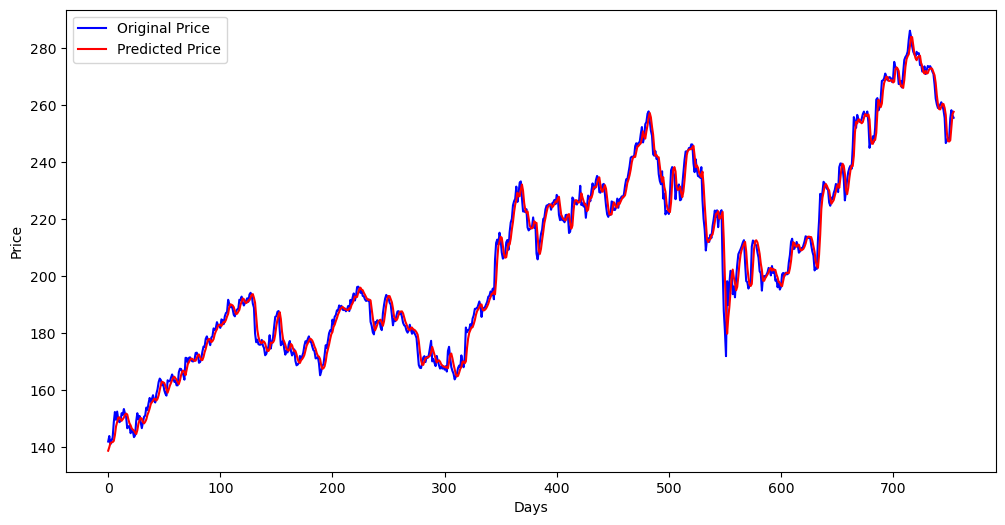

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(130.0, 260.0)

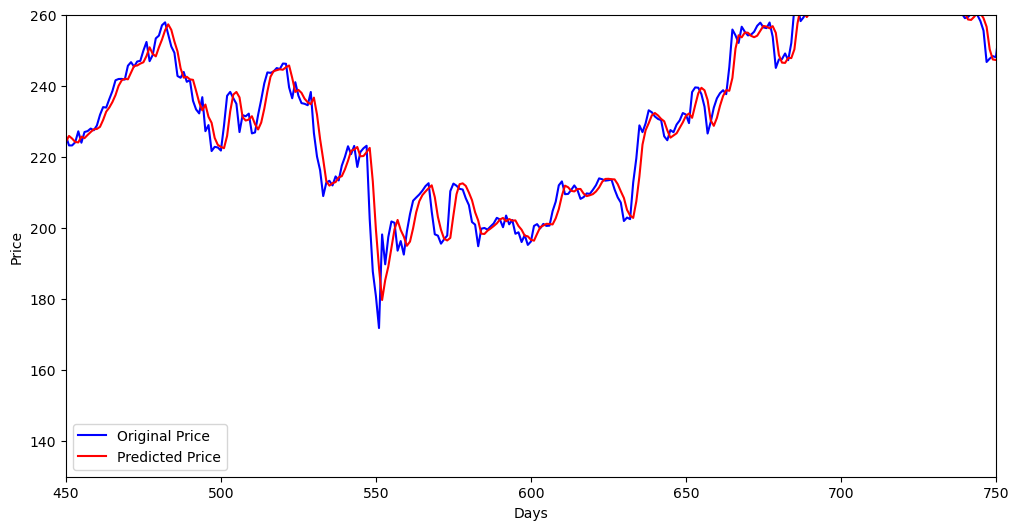

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(130, 260)

# 10. Model Evaluation

In [82]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error,r2_score

In [83]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.210422986292818


In [84]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.900054228634881


In [85]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.986629040321969
